Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [134]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers

In [135]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D,MaxPool2D, MaxPooling2D

In [136]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.callbacks import ReduceLROnPlateau # convert to one-hot-encoding


In [137]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [170]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path(r'C:\Users\teeka\Documents\Python\CNN\CNN\Train')
data_dir_test = pathlib.Path(r'C:\Users\teeka\Documents\Python\CNN\CNN\Test')

In [171]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [172]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [173]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split=0.2,
  subset="training",
  image_size=(img_height, img_width),
  batch_size=batch_size)
  
##todo

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [174]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds =tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size) ##todo

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [175]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

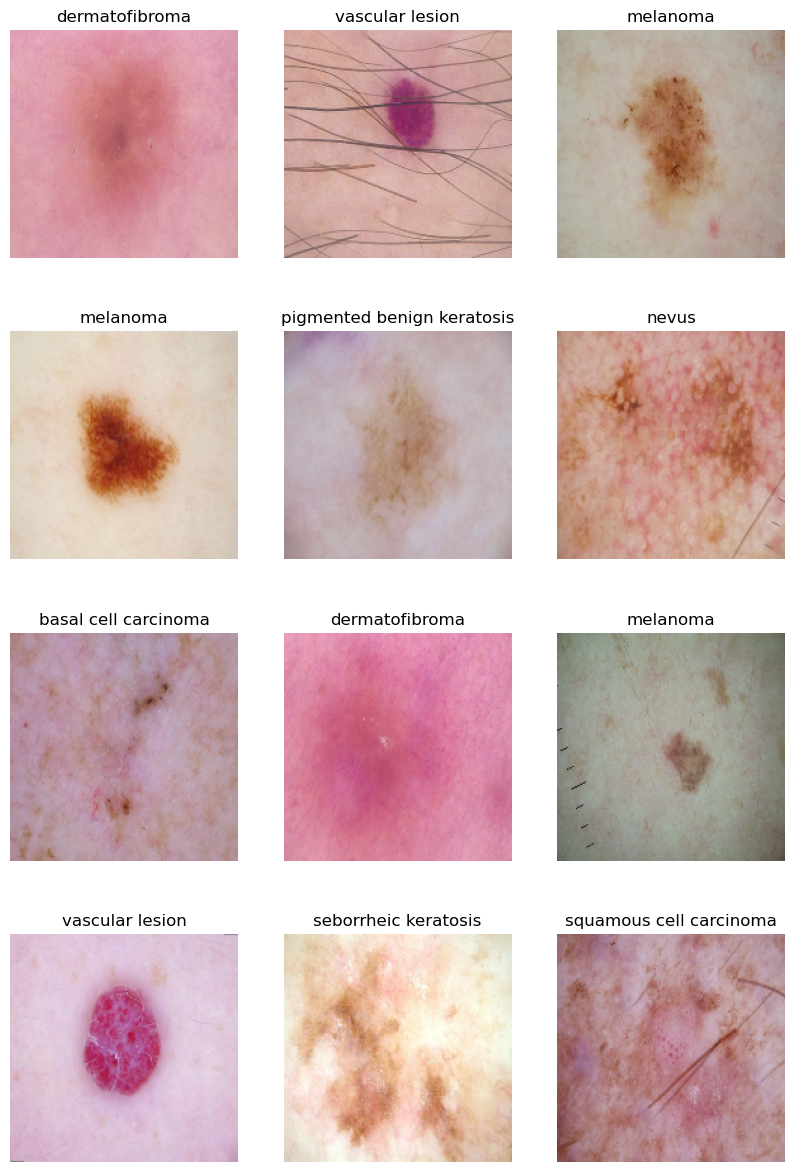

In [176]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 15))
for images, labels in train_ds.take(1):
  for i in range(12):
    ax = plt.subplot(4, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [177]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [182]:
### Your code goes here
model = Sequential()
model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))

model.add(Conv2D(32, kernel_size=(3, 3),activation= 'relu'))
model.add(Conv2D(32, kernel_size=(3, 3),activation= 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))



model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(9,activation='softmax'))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [183]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [184]:
# View the summary of all layers
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_15 (Rescaling)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 176, 176, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 88, 88, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 86, 86, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 86, 86, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 41, 41, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_60 (Dropout)            │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 512)            │    26,214,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_61 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 9)              │         4,617 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,322,793 (100.41 MB)

 Trainable params: 26,322,409 (100.41 MB)

 Non-trainable params: 384 (1.50 KB)

### Train the model

In [185]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 79s 454ms/step - accuracy: 0.2461 - loss: 21.3041 - val_accuracy: 0.0898 - val_loss: 14.8961
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 72s 428ms/step - accuracy: 0.3453 - loss: 2.0376 - val_accuracy: 0.1225 - val_loss: 4.0454
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 78s 462ms/step - accuracy: 0.4040 - loss: 1.6471 - val_accuracy: 0.2012 - val_loss: 15.3329
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 250s 1s/step - accuracy: 0.4236 - loss: 1.6292 - val_accuracy: 0.2012 - val_loss: 18.7035
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 73s 433ms/step - accuracy: 0.4884 - loss: 1.4033 - val_accuracy: 0.1359 - val_loss: 161.9120
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 74s 437ms/step - accuracy: 0.4957 - loss: 1.3549 - val_accuracy: 0.4477 - val_loss: 1.8913
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 82s 486ms/step - accuracy: 0.5413 - loss: 1.1868 - val_accuracy: 0.2153 - val_loss: 8.1493
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 80s 473ms/step - accuracy: 0.5724 - los

### Visualizing training results

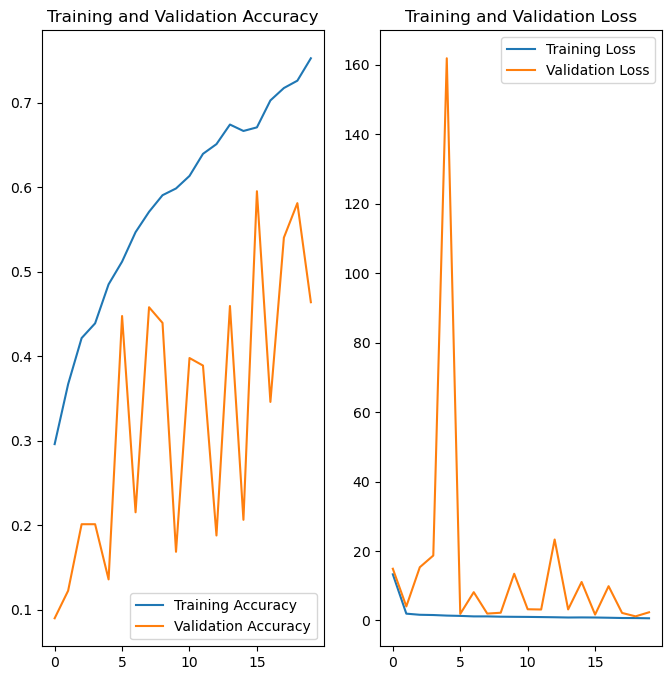

In [186]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfitng.

### Write your findings here
1. The Traing accuracy is continuously increasing and validation accuracy fluctuaing, but very low which indicates that the model is
underfitting
3. Training loss is very low, but validation loss is fluctuating.

In [187]:
#from tensorflow.keras.layers.experimental.preprocessing import Rescaling

In [188]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [189]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

image_class = ['nevus','melanoma','basal_cell_caricoma','actinic_keratosis','vasc_lesion','dermatofibroma', 'pigmented_keratosis', 'seborrheic_keratosis', 'squamous_carci']

train_batches = datagen.flow_from_directory(data_dir_train, 
    target_size = (180,180),
    classes = image_class,
    batch_size = 64
 )

valid_batches = datagen.flow_from_directory(data_dir_test, 
    target_size = (180,180),
    classes = image_class,
    batch_size = 64
)

Found 2390 images belonging to 9 classes.
Found 48 images belonging to 9 classes.


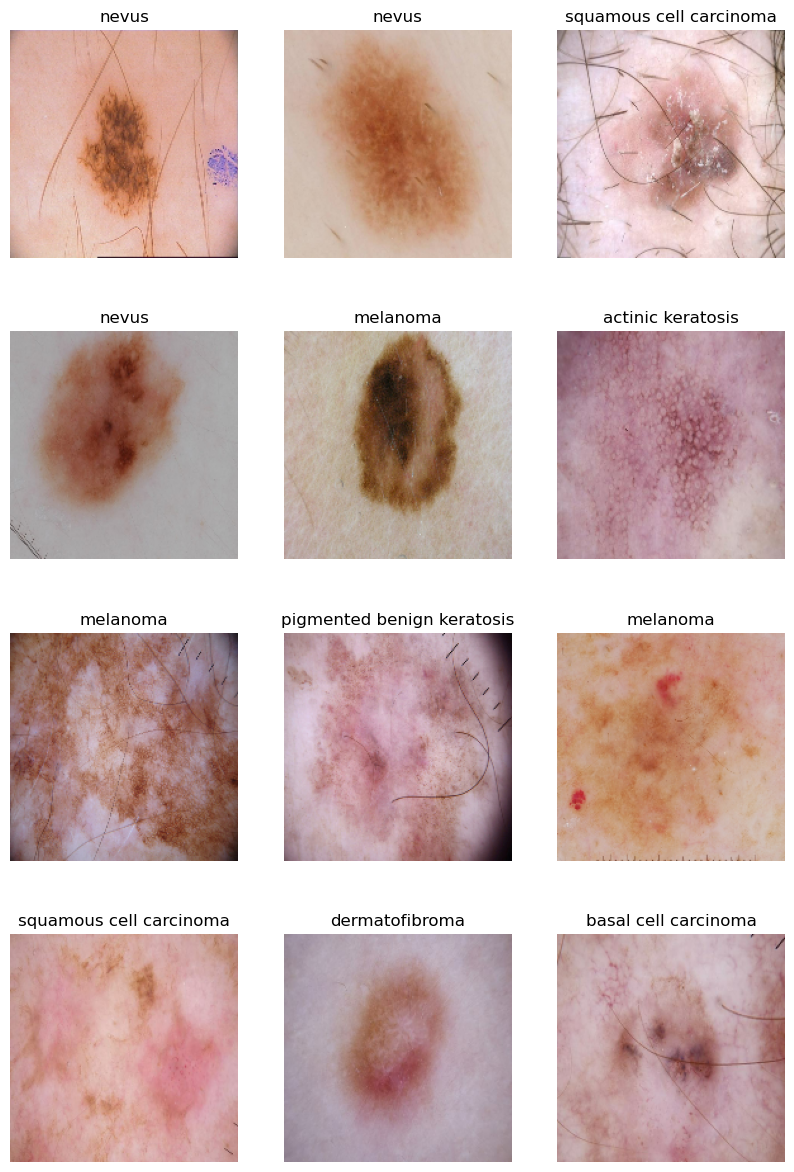

In [190]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# 

plt.figure(figsize=(10, 15))
for images, labels in train_ds.take(1):
  for i in range(12):
    ax = plt.subplot(4, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
### your code goes here, you can use training or validation data to visualize

### Todo:
### Create the model, compile and train the model


In [191]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes her
model = Sequential()
model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))

model.add(Conv2D(32, kernel_size=(3, 3),activation= 'relu'))
model.add(Conv2D(32, kernel_size=(3, 3),activation= 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))



model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(9,activation='softmax'))



### Compiling the model

In [192]:
## Your code goes here
optimizer=tf.keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

In [193]:
# Set a learning rate 
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
    patience=3, 
    verbose=1, 
    factor=0.5, 
    min_lr=0.00001)

In [194]:
# View the summary of all layers
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_16 (Rescaling)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_64 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_65 (Conv2D)              │ (None, 176, 176, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 88, 88, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_66 (Conv2D)              │ (None, 86, 86, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 86, 86, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_49 (MaxPooling2D) │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_67 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 41, 41, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_50 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_62 (Dropout)            │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 512)            │    26,214,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_63 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 9)              │         4,617 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,322,793 (100.41 MB)

 Trainable params: 26,322,409 (100.41 MB)

 Non-trainable params: 384 (1.50 KB)

### Training the model

In [195]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
batch_size = 10
history = model.fit(train_batches,
  epochs = epochs, verbose = 1, validation_data=valid_batches , callbacks=[learning_rate_reduction])

Epoch 1/20


C:\Users\teeka\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.5206 - loss: 12.7077 - val_accuracy: 0.3333 - val_loss: 1.5101 - learning_rate: 0.0010
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.6365 - loss: 7.8144 - val_accuracy: 0.2708 - val_loss: 3.9146 - learning_rate: 0.0010
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.7016 - loss: 3.4213 - val_accuracy: 0.3125 - val_loss: 3.5096 - learning_rate: 0.0010
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7389 - loss: 1.7309
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
38/38 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.7387 - loss: 1.7331 - val_accuracy: 0.3125 - val_loss: 1.9609 - learning_rate: 0.0010
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.7175 - loss: 1.2220 - val_accuracy: 0.2292 - val_loss: 1.8850 - learning_rate: 5.0000e-04
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.7927 - loss: 0.6667 - val_accuracy: 0.2708 -

### Visualizing the results

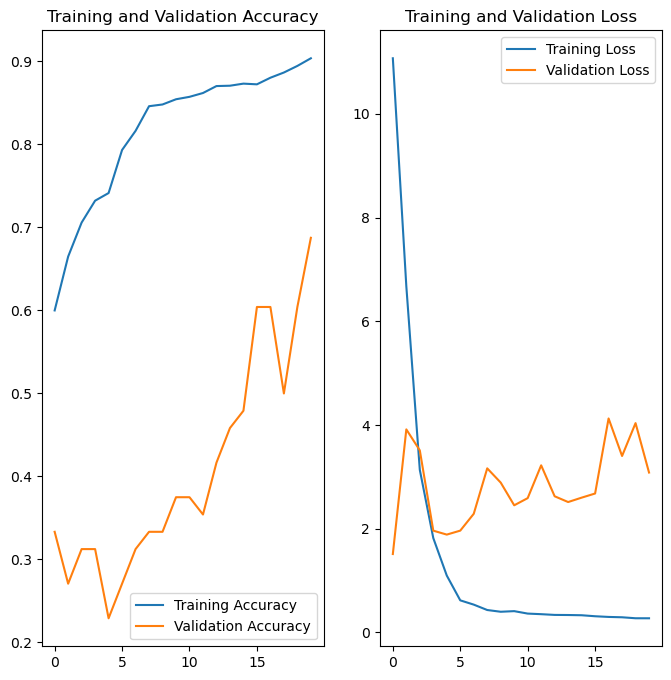

In [196]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<Figure size 1000x1000 with 0 Axes>

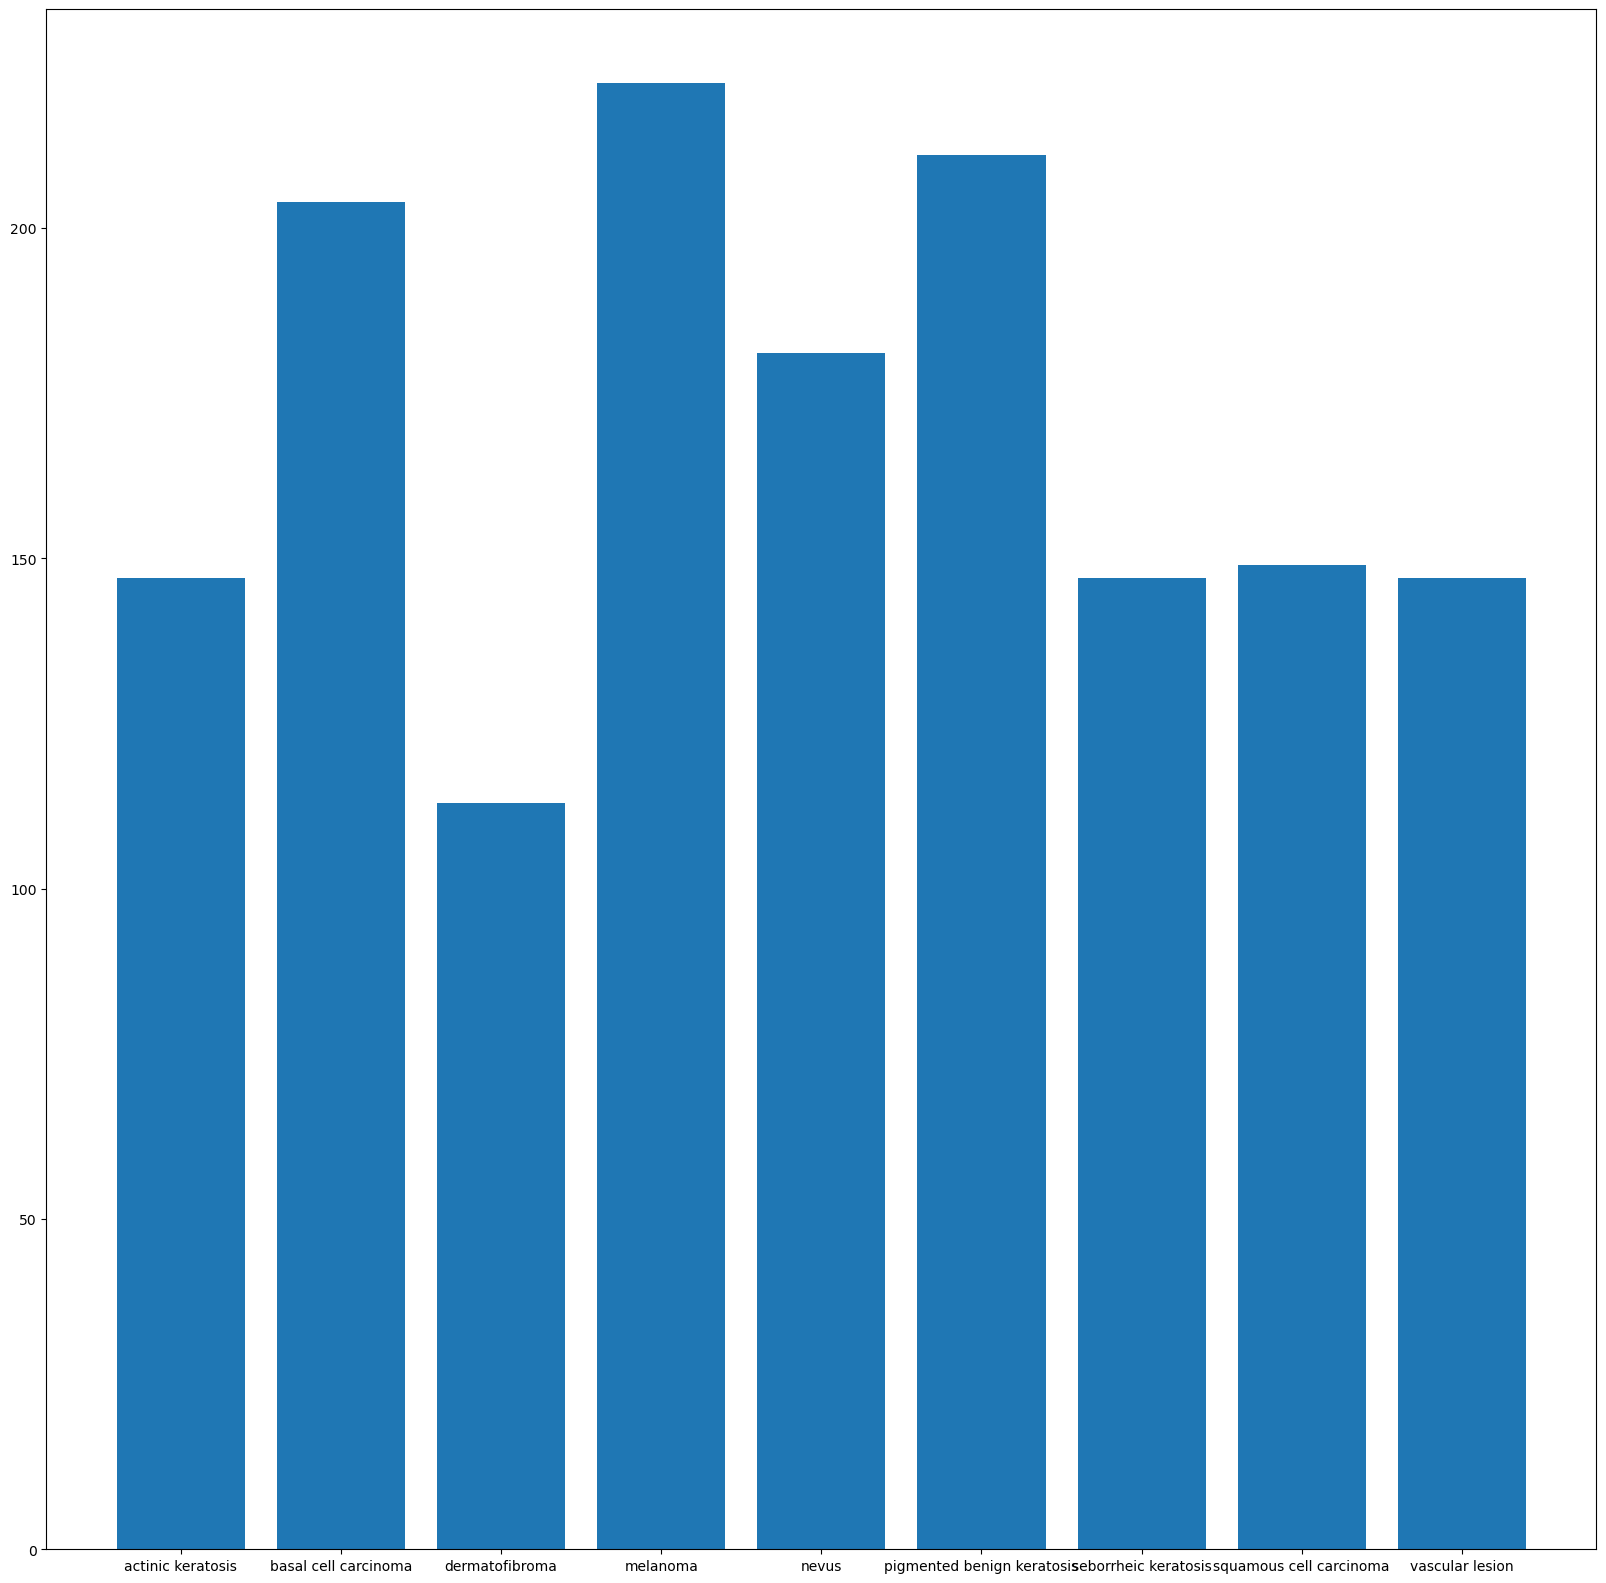

In [197]:
## Your code goes here.
# images in each classes
#import matplotlib.pyplot as plt
data = dict()

for i in class_names:
  data[i] = []

plt.figure(figsize=(10, 10))
for images, labels in train_ds:
  for i in range(9):
    data[class_names[labels[i]]].append(images[i].numpy().astype("uint8"))

for i in data:
  data[i] = len(data[i]) 

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)

plt.bar(range(len(data)), list(data.values()), align='center')
plt.xticks(range(len(data)), list(data.keys()))
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [198]:
!pip install Augmentor

Defaulting to user installation because normal site-packages is not writeable


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [199]:
path_to_training_dataset="C:/Users/teeka/Documents/Python/CNN/CNN/Train"

In [200]:
#path_to_training_dataset="To do"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset+ "/" + i )
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to C:/Users/teeka/Documents/Python/CNN/CNN/Train/actinic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1C0447AD7D0>: 100%|██████████| 500/500 [00:01<00:00, 403.29 Samples/s]


Initialised with 376 image(s) found.
Output directory set to C:/Users/teeka/Documents/Python/CNN/CNN/Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1C0447E96D0>: 100%|██████████| 500/500 [00:01<00:00, 383.99 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to C:/Users/teeka/Documents/Python/CNN/CNN/Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1BF68975DD0>: 100%|██████████| 500/500 [00:01<00:00, 413.43 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to C:/Users/teeka/Documents/Python/CNN/CNN/Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1C04479F9D0>: 100%|██████████| 500/500 [00:05<00:00, 84.76 Samples/s]                    


Initialised with 357 image(s) found.
Output directory set to C:/Users/teeka/Documents/Python/CNN/CNN/Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x1C04480DC50>: 100%|██████████| 500/500 [00:05<00:00, 86.09 Samples/s]                   


Initialised with 462 image(s) found.
Output directory set to C:/Users/teeka/Documents/Python/CNN/CNN/Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1BF648D5C90>: 100%|██████████| 500/500 [00:01<00:00, 390.77 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to C:/Users/teeka/Documents/Python/CNN/CNN/Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1BF62641D50>: 100%|██████████| 500/500 [00:02<00:00, 187.88 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to C:/Users/teeka/Documents/Python/CNN/CNN/Train/squamous cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1BF555981D0>: 100%|██████████| 500/500 [00:01<00:00, 409.24 Samples/s]


Initialised with 139 image(s) found.
Output directory set to C:/Users/teeka/Documents/Python/CNN/CNN/Train/vascular lesion\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1BF689EF350>: 100%|██████████| 500/500 [00:01<00:00, 408.38 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [201]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [202]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

9000


In [205]:
from glob import glob

### Lets see the distribution of augmented data after adding new images to the original training data.

In [206]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['C:\\Users\\teeka\\Documents\\Python\\CNN\\CNN\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_20d60998-a715-4349-80cf-39640771e3af.jpg',
 'C:\\Users\\teeka\\Documents\\Python\\CNN\\CNN\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_b992146d-06e3-4f26-9e37-91e9b7b9aa7c.jpg',
 'C:\\Users\\teeka\\Documents\\Python\\CNN\\CNN\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_d93b3a92-8133-4e63-8dc1-c0db249fcf56.jpg',
 'C:\\Users\\teeka\\Documents\\Python\\CNN\\CNN\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_eebcafeb-2a13-44f4-be1a-1c4bad839cfa.jpg',
 'C:\\Users\\teeka\\Documents\\Python\\CNN\\CNN\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_2141a1f9-d93c-42b4-a4b1-2b2c4d88f87d.jpg',
 'C:\\Users\\teeka\\Documents\\Python\\CNN\\CNN\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_272661ca-b66f-4ef1-a42b

In [207]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [209]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [218]:
2)

SyntaxError: unmatched ')' (882733905.py, line 8)

In [219]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2

In [220]:
new_df['Label'].value_counts()

Label
actinic keratosis             1000
basal cell carcinoma          1000
dermatofibroma                1000
melanoma                      1000
nevus                         1000
pigmented benign keratosis    1000
seborrheic keratosis          1000
squamous cell carcinoma       1000
vascular lesion               1000
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [221]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [222]:
data_dir_train=r'C:\Users\teeka\Documents\Python\CNN\CNN\Train'#"path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


#### **Todo:** Create a validation dataset

In [223]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [224]:
## your code goes here
model = Sequential()
model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))

model.add(Conv2D(32, kernel_size=(3, 3),activation= 'relu'))
model.add(Conv2D(32, kernel_size=(3, 3),activation= 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))



model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(9,activation='softmax'))

C:\Users\teeka\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [225]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [226]:
#epochs = 30
## Your code goes here, use 50 epochs.
epochs = 50

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
    patience=3, 
    verbose=1, 
    factor=0.5, 
    min_lr=0.00001)

batch_size = 10
history = model.fit(train_ds,
  epochs = epochs, verbose = 1, validation_data=val_ds , callbacks=[learning_rate_reduction])


Epoch 1/50


C:\Users\teeka\AppData\Roaming\Python\Python311\site-packages\keras\src\backend\tensorflow\nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


281/281 ━━━━━━━━━━━━━━━━━━━━ 116s 409ms/step - accuracy: 0.2921 - loss: 18.4741 - val_accuracy: 0.2065 - val_loss: 2.1166 - learning_rate: 0.0010
Epoch 2/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 113s 402ms/step - accuracy: 0.3926 - loss: 1.8373 - val_accuracy: 0.3222 - val_loss: 2.5664 - learning_rate: 0.0010
Epoch 3/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 113s 403ms/step - accuracy: 0.4644 - loss: 1.4367 - val_accuracy: 0.3364 - val_loss: 2.1741 - learning_rate: 0.0010
Epoch 4/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 114s 407ms/step - accuracy: 0.5282 - loss: 1.3115 - val_accuracy: 0.3903 - val_loss: 5.1239 - learning_rate: 0.0010
Epoch 5/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 116s 413ms/step - accuracy: 0.5672 - loss: 1.1594 - val_accuracy: 0.3093 - val_loss: 3.2776 - learning_rate: 0.0010
Epoch 6/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 115s 410ms/step - accuracy: 0.6062 - loss: 1.0977 - val_accuracy: 0.4321 - val_loss: 2.9737 - learning_rate: 0.0010
Epoch 7/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 116s 412ms/step - accuracy: 0.6485

#### **Todo:**  Visualize the model results

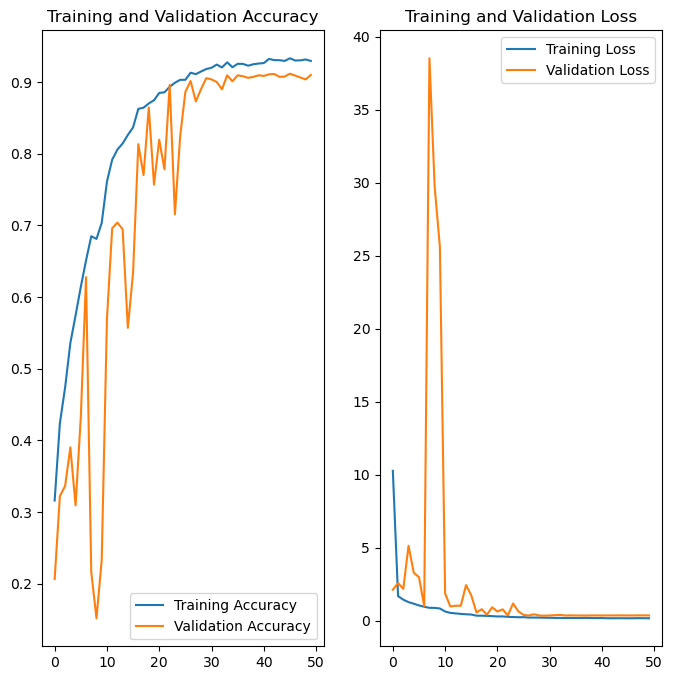

In [227]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

